In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("teamincribo/cyber-security-attacks")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cyber-security-attacks


In [3]:
sns.set_style('darkgrid')

In [4]:
csa = pd.read_csv('/kaggle/input/cyber-security-attacks/cybersecurity_attacks.csv')

In [5]:
csa.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [6]:
csa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [8]:
csa.shape

(40000, 25)

In [9]:
csa.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [10]:
csa = csa.drop(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port','Payload Data','Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts' ],axis = 1)

In [11]:
csa.head()

,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Log Source
0,ICMP,503,Data,HTTP,IoC Detected,28.67,NaN,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Server
1,ICMP,1174,Data,HTTP,IoC Detected,51.50,NaN,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Firewall
2,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Firewall
3,UDP,385,Data,HTTP,NaN,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Firewall
4,TCP,1462,Data,DNS,NaN,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Firewall


In [12]:
csa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Protocol            40000 non-null  object 
 1   Packet Length       40000 non-null  int64  
 2   Packet Type         40000 non-null  object 
 3   Traffic Type        40000 non-null  object 
 4   Malware Indicators  20000 non-null  object 
 5   Anomaly Scores      40000 non-null  float64
 6   Alerts/Warnings     19933 non-null  object 
 7   Attack Type         40000 non-null  object 
 8   Attack Signature    40000 non-null  object 
 9   Action Taken        40000 non-null  object 
 10  Severity Level      40000 non-null  object 
 11  User Information    40000 non-null  object 
 12  Device Information  40000 non-null  object 
 13  Log Source          40000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 4.3+ MB


In [13]:
csa = csa.dropna(axis = 0)

In [14]:
csa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9953 entries, 2 to 39998
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Protocol            9953 non-null   object 
 1   Packet Length       9953 non-null   int64  
 2   Packet Type         9953 non-null   object 
 3   Traffic Type        9953 non-null   object 
 4   Malware Indicators  9953 non-null   object 
 5   Anomaly Scores      9953 non-null   float64
 6   Alerts/Warnings     9953 non-null   object 
 7   Attack Type         9953 non-null   object 
 8   Attack Signature    9953 non-null   object 
 9   Action Taken        9953 non-null   object 
 10  Severity Level      9953 non-null   object 
 11  User Information    9953 non-null   object 
 12  Device Information  9953 non-null   object 
 13  Log Source          9953 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.1+ MB


In [15]:
csa.head()

,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Log Source
2,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Firewall
7,ICMP,1022,Data,DNS,IoC Detected,54.05,Alert Triggered,Intrusion,Known Pattern A,Logged,High,Yuvaan Dubey,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_7_6...,Firewall
8,TCP,1281,Control,FTP,IoC Detected,56.34,Alert Triggered,Intrusion,Known Pattern A,Blocked,High,Zaina Iyer,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_5_8...,Server
27,TCP,282,Control,HTTP,IoC Detected,44.40,Alert Triggered,DDoS,Known Pattern A,Logged,Low,Anahi Apte,Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...,Firewall
30,TCP,1313,Control,HTTP,IoC Detected,69.20,Alert Triggered,DDoS,Known Pattern B,Logged,Low,Tushar Borra,Mozilla/5.0 (iPad; CPU iPad OS 3_1_3 like Mac ...,Firewall


In [16]:
csa = csa.drop(['Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type'],axis = 1)

In [17]:
csa.head()

,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Log Source
2,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Firewall
7,IoC Detected,54.05,Alert Triggered,Intrusion,Known Pattern A,Logged,High,Yuvaan Dubey,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_7_6...,Firewall
8,IoC Detected,56.34,Alert Triggered,Intrusion,Known Pattern A,Blocked,High,Zaina Iyer,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_5_8...,Server
27,IoC Detected,44.40,Alert Triggered,DDoS,Known Pattern A,Logged,Low,Anahi Apte,Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...,Firewall
30,IoC Detected,69.20,Alert Triggered,DDoS,Known Pattern B,Logged,Low,Tushar Borra,Mozilla/5.0 (iPad; CPU iPad OS 3_1_3 like Mac ...,Firewall


In [19]:
csa = csa.reset_index()

In [20]:
csa = csa.drop('index',axis =1)

In [21]:
csa.head()

,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Log Source
0,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Firewall
1,IoC Detected,54.05,Alert Triggered,Intrusion,Known Pattern A,Logged,High,Yuvaan Dubey,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_7_6...,Firewall
2,IoC Detected,56.34,Alert Triggered,Intrusion,Known Pattern A,Blocked,High,Zaina Iyer,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_5_8...,Server
3,IoC Detected,44.40,Alert Triggered,DDoS,Known Pattern A,Logged,Low,Anahi Apte,Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...,Firewall
4,IoC Detected,69.20,Alert Triggered,DDoS,Known Pattern B,Logged,Low,Tushar Borra,Mozilla/5.0 (iPad; CPU iPad OS 3_1_3 like Mac ...,Firewall


In [22]:
csa.describe()

,Anomaly Scores
count,9953.000000
mean,49.842350
std,28.823148
min,0.000000
25%,25.010000
50%,49.700000
75%,74.720000
max,99.990000


In [23]:
csa.columns

Index(['Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
       'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level',
       'User Information', 'Device Information', 'Log Source'],
      dtype='object')

<Axes: xlabel='Anomaly Scores', ylabel='Severity Level'>

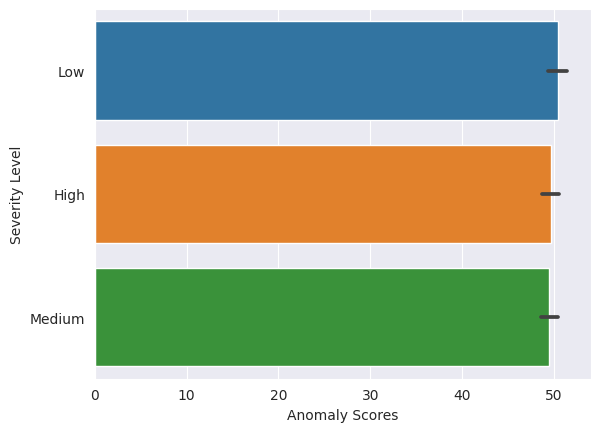

In [26]:
sns.barplot(x ='Anomaly Scores',y ='Severity Level', data = csa )

<Axes: xlabel='Severity Level', ylabel='count'>

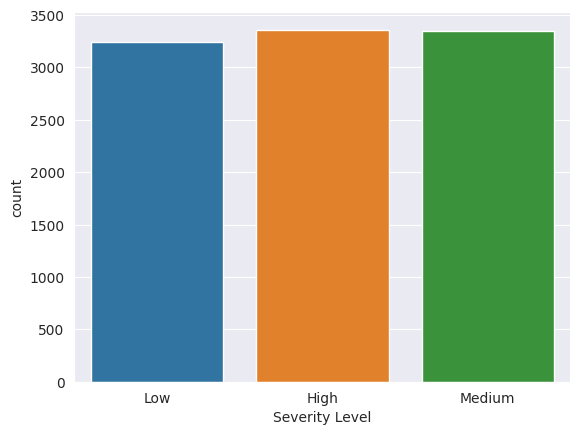

In [27]:
sns.countplot(x='Severity Level',data = csa)

In [33]:
sev = pd.get_dummies(csa['Severity Level'],dtype = int , drop_first = True)

In [34]:
sev.head()

,Low,Medium
0,1,0
1,0,0
2,0,0
3,1,0
4,1,0


In [35]:
ncsa = pd.concat([csa,sev],axis = 1)

In [36]:
ncsa.head()

,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Log Source,Low,Medium
0,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Firewall,1,0
1,IoC Detected,54.05,Alert Triggered,Intrusion,Known Pattern A,Logged,High,Yuvaan Dubey,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_7_6...,Firewall,0,0
2,IoC Detected,56.34,Alert Triggered,Intrusion,Known Pattern A,Blocked,High,Zaina Iyer,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_5_8...,Server,0,0
3,IoC Detected,44.40,Alert Triggered,DDoS,Known Pattern A,Logged,Low,Anahi Apte,Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...,Firewall,1,0
4,IoC Detected,69.20,Alert Triggered,DDoS,Known Pattern B,Logged,Low,Tushar Borra,Mozilla/5.0 (iPad; CPU iPad OS 3_1_3 like Mac ...,Firewall,1,0


<Axes: ylabel='count'>

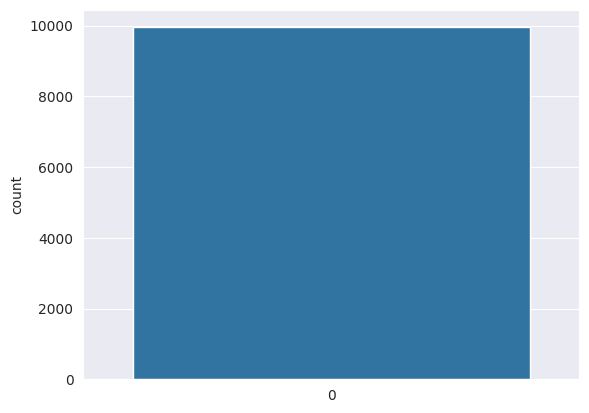

In [39]:
sns.countplot(ncsa['Low'])

In [40]:
ncsa.shape

(9953, 12)

In [42]:
ncsa.columns

Index(['Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
       'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level',
       'User Information', 'Device Information', 'Log Source', 'Low',
       'Medium'],
      dtype='object')

In [41]:
from sklearn.model_selection import train_test_split

In [44]:
X = ncsa[['Anomaly Scores','Medium']]
y= ncsa['Low']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [52]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
input_shape = [2]

In [49]:
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(9953,activation='relu',input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(1,activation='sigmoid')
])

In [50]:
model.compile(
    optimizer = 'adam',
    loss = 'mae'
    # metrics = ['binary_classification']
)

In [53]:
early_stopping = EarlyStopping(
    min_delta = 0.001,
    patience = 5,
    restore_best_weights = True
)

In [54]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

In [55]:
history = model.fit(
    X_train, y_train,
    batch_size=1000,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 257ms/step - loss: 0.4320
Epoch 2/100


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - loss: 0.3359
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - loss: 0.3377
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - loss: 0.3310
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 258ms/step - loss: 0.3241
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step - loss: 0.3350
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - loss: 0.3272
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - loss: 0.3235
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - loss: 0.3249
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - loss: 0.3259
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - loss: 0.3244
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step - loss: 0.3256
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step - loss: 0.3225
Epoch 14/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - loss: 0.3253
Epoch 15/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - loss: 0.3206
Epoch 16/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - loss: 0.3257
Epoch 17/100
7/

In [56]:
history_df = pd.DataFrame(history.history)

In [57]:
history_df.columns

Index(['loss'], dtype='object')

Minimum Validation Loss: 0.3224


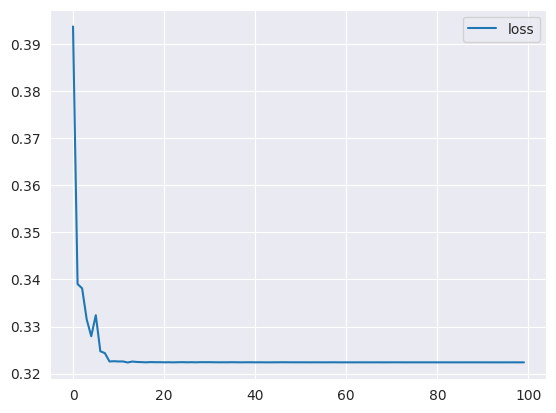

In [58]:
history_df.loc[:, ['loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['loss'].min()));

In [68]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [71]:
dtree = DecisionTreeClassifier(max_depth  =3,random_state = 42)

In [72]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [73]:
predictor = dtree.predict(X_test)

In [65]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_test,predictor))

              precision    recall  f1-score   support

           0       0.68      0.95      0.79      1988
           1       0.54      0.12      0.20       998

    accuracy                           0.67      2986
   macro avg       0.61      0.53      0.49      2986
weighted avg       0.63      0.67      0.59      2986



In [82]:
ncsa.columns

Index(['Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
       'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level',
       'User Information', 'Device Information', 'Log Source', 'Low',
       'Medium'],
      dtype='object')

In [79]:
feature_names = X.columns

In [83]:
target_names = ncsa['Severity Level']

Text(0.5, 1.0, 'Decision Tree Visualization')

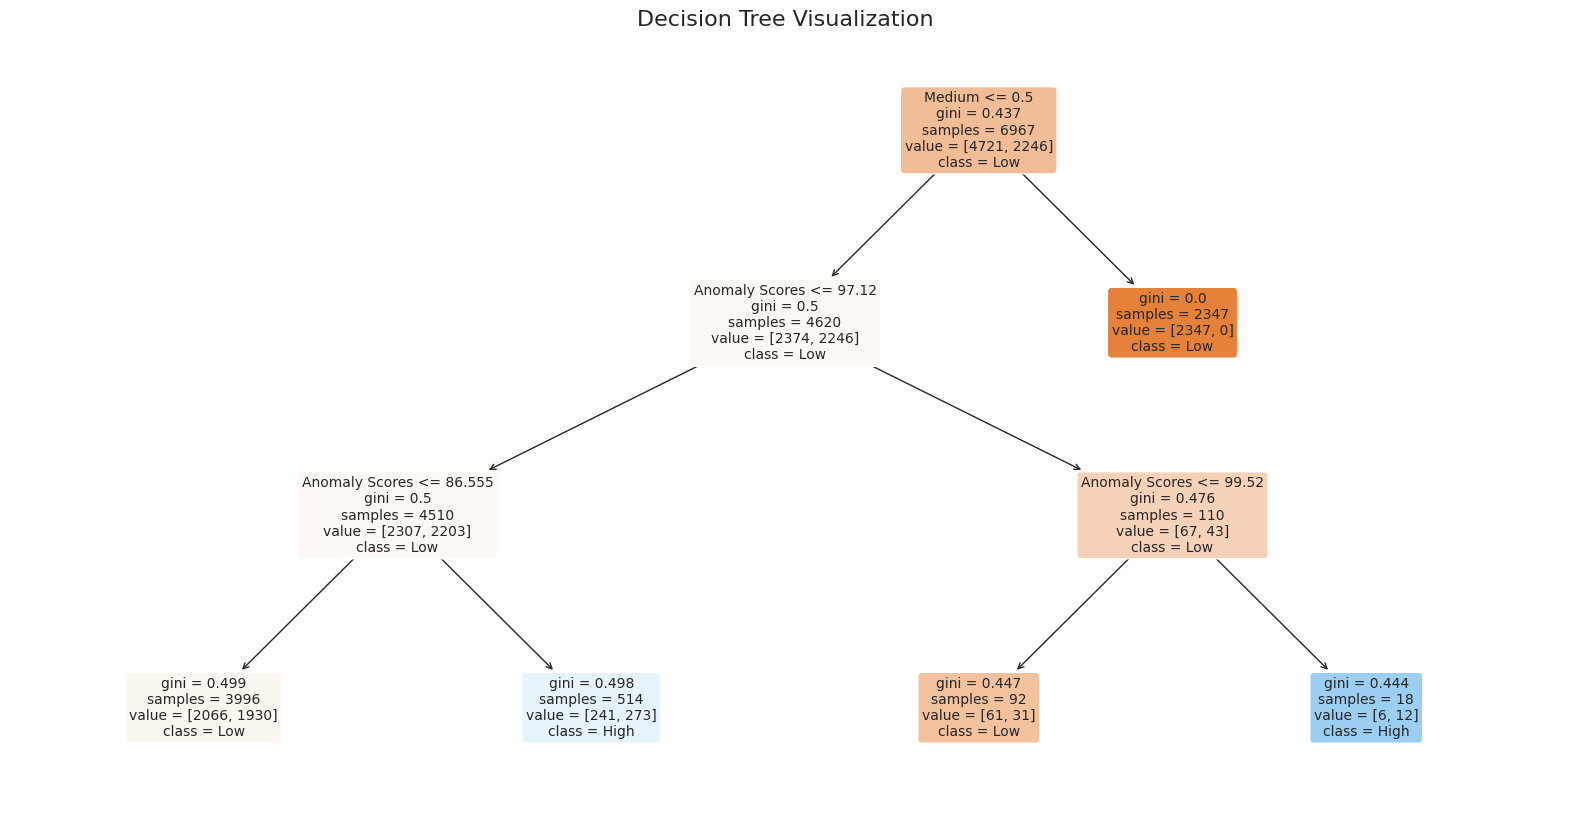

In [84]:
plt.figure(figsize=(20, 10))

plot_tree(dtree,
          feature_names=feature_names,
          class_names=target_names,
          filled=True,     # Color nodes based on the majority class
          rounded=True,    # Round node corners
          impurity=True,   # Show the Gini impurity value
          fontsize=10)

plt.title("Decision Tree Visualization", fontsize=16)